## Data Importing

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from scipy.special import inv_boxcox


df = pd.read_csv('../dataset/train.csv')
df = df.drop('Id',axis=1)


# Data Exploration

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [22]:
categorical = df.select_dtypes(include=['object'])
non_categorical = df.select_dtypes(exclude=['object'])

In [23]:
non_categorical

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [24]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

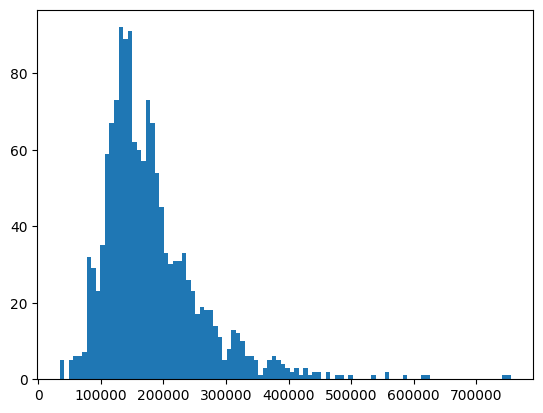

In [25]:
plt.hist(non_categorical['SalePrice'],bins=100)
plt.show()


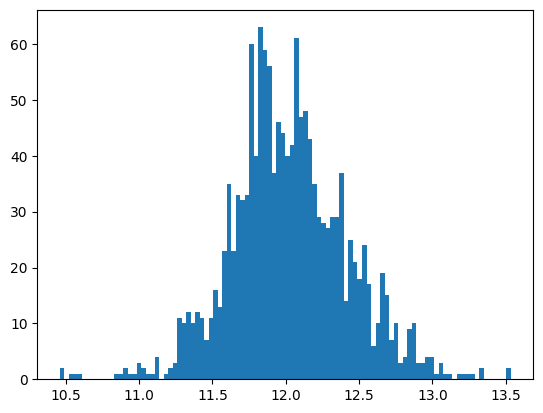

In [26]:

plt.hist(np.log(non_categorical['SalePrice']),bins=100)
plt.show()

# Feature Engineering

In [27]:
#Limpando dados 
categorical = categorical.fillna('0')
non_categorical = non_categorical.fillna(0)
#aplicando one hot encoder
categorical_encoder = pd.get_dummies(categorical)
categorical_encoder

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1456,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1457,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1458,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False


# Aplicando o modelo

In [28]:
# separando feature e target
X = pd.concat([categorical_encoder , non_categorical],axis =1)
X = X.drop('SalePrice',axis=1)
y = non_categorical['SalePrice']
y_log = y.apply(np.log)
y_boxcox, lambda_value = boxcox(y)


In [37]:
# Criando e treinando o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=500,oob_score=True)  # Habilita o cálculo do OOB Score
rf_model.fit(X, y)

# Criando e treinnando o modelo de Random Forest utilizando Log
rf_model_log = RandomForestRegressor(n_estimators=500,oob_score=True)  # Habilita o cálculo do OOB Score
rf_model_log.fit(X, y_log)

# Criando e treinnando o modelo de Random Forest utilizando Log
rf_model_boxcox = RandomForestRegressor(n_estimators=500,oob_score=True)  # Habilita o cálculo do OOB Score
rf_model_boxcox.fit(X, y_boxcox)

# OOB Score do modelo
print("OOB Score do modelo, com R2 score: ", rf_model.oob_score_)
print("OOB Score do modelo, com R2 score aplicando log no target: ", rf_model_log.oob_score_)
print("OOB Score do modelo, com R2 score aplicando boxcox no target: ", rf_model_boxcox.oob_score_)

OOB Score do modelo, com R2 score:  0.8634232123327841
OOB Score do modelo, com R2 score aplicando log no target:  0.8710199379124994
OOB Score do modelo, com R2 score aplicando boxcox no target:  0.8680807125238653


In [38]:
# Aplicando a validação cruzada
cv_scores = cross_val_score(RandomForestRegressor(n_estimators=100), X, y, cv=5, scoring='r2')
cv_scores_log = cross_val_score(RandomForestRegressor(n_estimators=100), X, y.apply(np.log), cv=5, scoring='r2')
cv_scores_boxcox = cross_val_score(RandomForestRegressor(n_estimators=100), X, y_boxcox, cv=5, scoring='r2')
# Exibindo os scores de validação cruzada
print("R² Scores da validação cruzada:", cv_scores)
print("R² Scores da validação cruzada com log:", cv_scores_log)
print("R² Scores da validação cruzada com boxcox:", cv_scores_boxcox)
# Calculando a média dos scores
mean_r2 = cv_scores.mean()
mean_r2_log = cv_scores_log.mean()
mean_r2_boxcox = cv_scores_boxcox.mean()
print("Média dos R² Scores:", mean_r2,mean_r2_log,mean_r2_boxcox)

R² Scores da validação cruzada: [0.86974577 0.84269068 0.87001307 0.88485216 0.80485632]
R² Scores da validação cruzada com log: [0.867895   0.86124502 0.86798239 0.87531767 0.84751697]
R² Scores da validação cruzada com boxcox: [0.86411508 0.85425821 0.86538256 0.87874869 0.84737687]
Média dos R² Scores: 0.8544316011710794 0.8639914108480911 0.8619762837830379


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train_boxcox, lambda_train = boxcox(y_train)
y_test_boxcox, lambda_test = boxcox(y_test)

# Criando e treinando o modelo de Random Forest
rf_model_traintest = RandomForestRegressor(n_estimators=500)
rf_model_traintest.fit(X_train, y_train)

# Criando e treinando o modelo de Random Forest com log
rf_model_traintest_log = RandomForestRegressor(n_estimators=500)
rf_model_traintest_log.fit(X_train, y_train.apply(np.log))

# Criando e treinando o modelo de Random Forest com boxcox
rf_model_traintest_boxcox = RandomForestRegressor(n_estimators=500)
rf_model_traintest_boxcox.fit(X_train, y_train_boxcox)

# Fazendo previsões no conjunto de teste
predictions = rf_model_traintest.predict(X_test)
predictions_log = rf_model_traintest_log.predict(X_test)
predictions_boxcox = rf_model_traintest_boxcox.predict(X_test)


# Revertendo a transformação Box-Cox nas previsões
predictions_inverse_boxcox = inv_boxcox(predictions_boxcox, lambda_train)

# Avaliando o desempenho do modelo
r2 = r2_score(y_test, predictions)
r2_log = r2_score(y_test.apply(np.log),predictions_log)
r2_boxcox = r2_score(y_test, predictions_inverse_boxcox)

print("R² Score:", r2)
print("R² Score com log:", r2_log)
print("R² Score com boxcox:", r2_boxcox)

R² Score: 0.8894876018601903
R² Score com log: 0.8734485191991648
R² Score com boxcox: 0.8877016892016255


# Feature Importance

In [41]:
# Obtendo a importancia das features
importances = rf_model_traintest.feature_importances_
feature_importance_map = dict(zip(X.columns,importances))
feature_importance_map = sorted(feature_importance_map.items(),key=lambda x: x[1],reverse= True)

#printando as features que representam 95% do modelo
a=0
for feature in feature_importance_map:
    print(feature)
    a=a+feature[1]
    if a >0.95:
        break



('OverallQual', 0.6026231860418285)
('GrLivArea', 0.1003180605757316)
('2ndFlrSF', 0.04351145104880518)
('TotalBsmtSF', 0.035707772392818735)
('BsmtFinSF1', 0.028126376519043334)
('1stFlrSF', 0.022693905978109517)
('LotArea', 0.019495072901703648)
('GarageCars', 0.01677217339758635)
('GarageArea', 0.01584254086760859)
('YearBuilt', 0.011008760666990301)
('LotFrontage', 0.00862887775874722)
('YearRemodAdd', 0.007633787753933078)
('GarageYrBlt', 0.007218782892039787)
('WoodDeckSF', 0.006836450126666094)
('MasVnrArea', 0.006764380993690538)
('TotRmsAbvGrd', 0.006694196782568068)
('BsmtUnfSF', 0.005961722923002235)
('OpenPorchSF', 0.005503710935305613)


# Analise dos Resídos


In [ ]:
#Analisando residuos quando sem aplicar log e aplicando log

residual = pd.DataFrame(y_test - predictions)
residual_log = pd.DataFrame(y_test.apply(np.log) - predictions_log)


# Criar um objeto Standardscale
scaler = StandardScaler()
# Ajustar o scaler aos dados e transformar os dados
residual= scaler.fit_transform(residual)  # reshape para garantir que os dados tenham a forma correta
residual_log = scaler.fit_transform(residual_log)


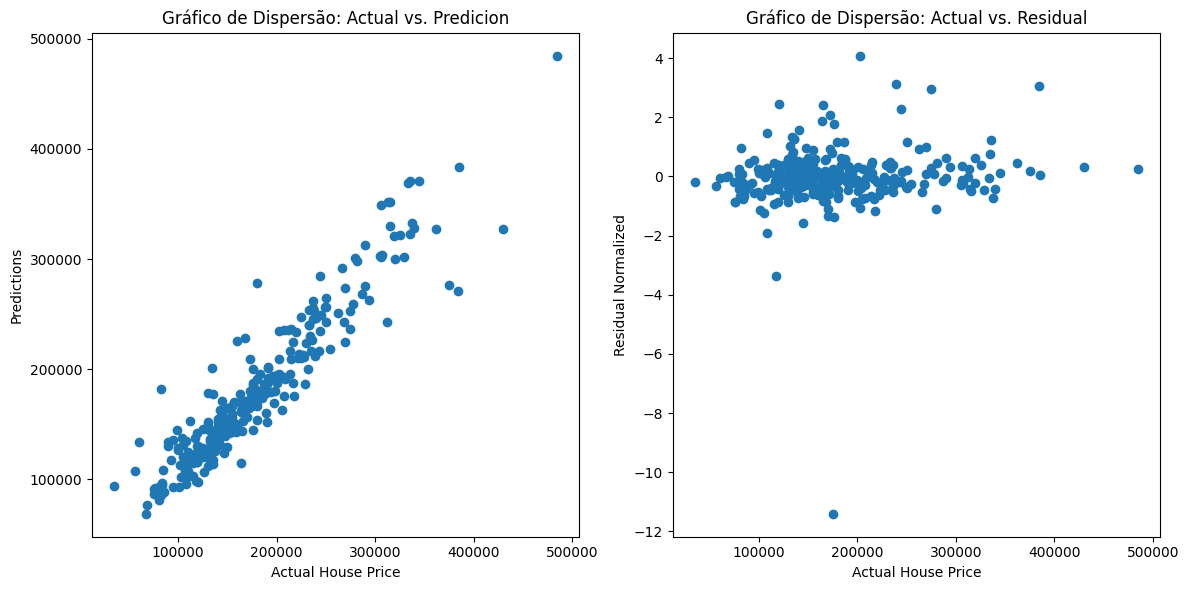

In [39]:
# Criar subplots
plt.figure(figsize=(12, 6))  # Define o tamanho da figura

# Primeiro subplot
plt.subplot(1, 2, 1)  # 1 linha, 3 colunas, primeiro subplot
plt.scatter(y_test,predictions)
plt.xlabel('Actual House Price')
plt.ylabel('Predictions')
plt.title(f'Gráfico de Dispersão: Actual vs. Predicion')

# Segundo subplot
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo subplot
plt.scatter(y_test,residual)
plt.xlabel('Actual House Price')
plt.ylabel('Residual Normalized')
plt.title(f'Gráfico de Dispersão: Actual vs. Residual')


# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()


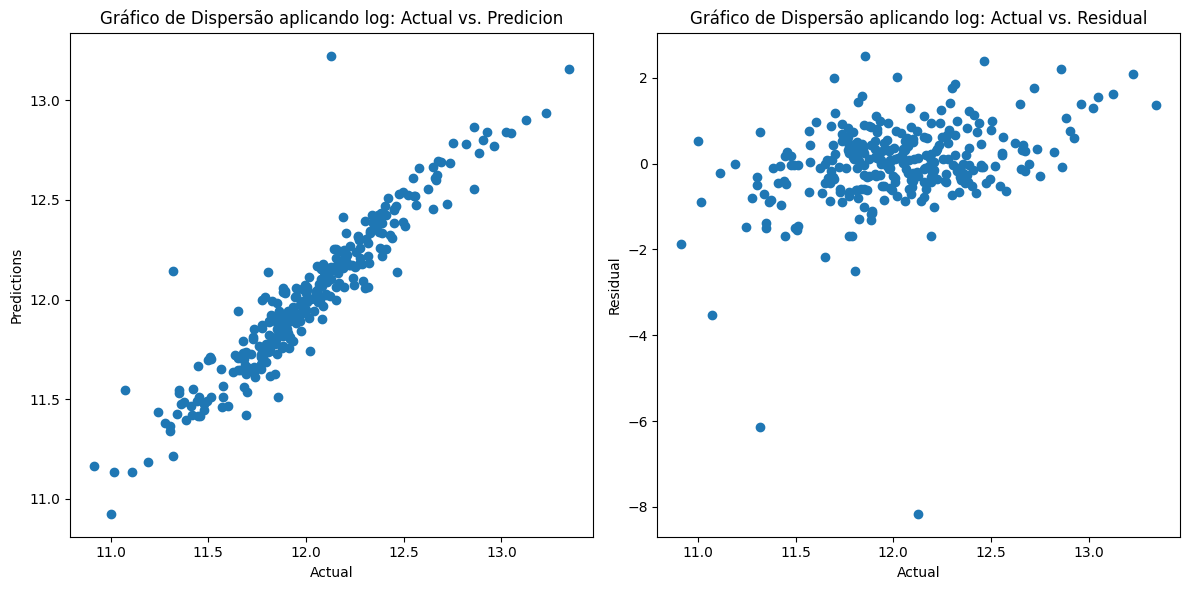

In [ ]:
# Criar subplots
plt.figure(figsize=(12, 6))  # Define o tamanho da figura

# Primeiro subplot
plt.subplot(1, 2, 1)  # 1 linha, 3 colunas, primeiro subplot
plt.scatter(y_test.apply(np.log) , predictions_log)
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.title(f'Gráfico de Dispersão aplicando log: Actual vs. Predicion')

# Segundo subplot
plt.subplot(1, 2, 2)  # 1 linha, 3 colunas, segundo subplot
plt.scatter(y_test.apply(np.log),residual_log)
plt.xlabel('Log(House Price)')
plt.ylabel('Residual')
plt.title(f'Gráfico de Dispersão aplicando log: Actual vs. Residual')



# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()
